# K-NN (K-Nearest Neighbors – K-Vizinhos Mais Próximos)

k-NN é um tipo de classificação onde a função é aproximada apenas localmente e todos os cálculos são adiados até a avaliação da função. Como esse algoritmo depende da distância para classificação, se os recursos representarem unidades físicas diferentes ou vierem em escalas muito diferentes, a normalização dos dados de treinamento pode melhorar drasticamente sua precisão.

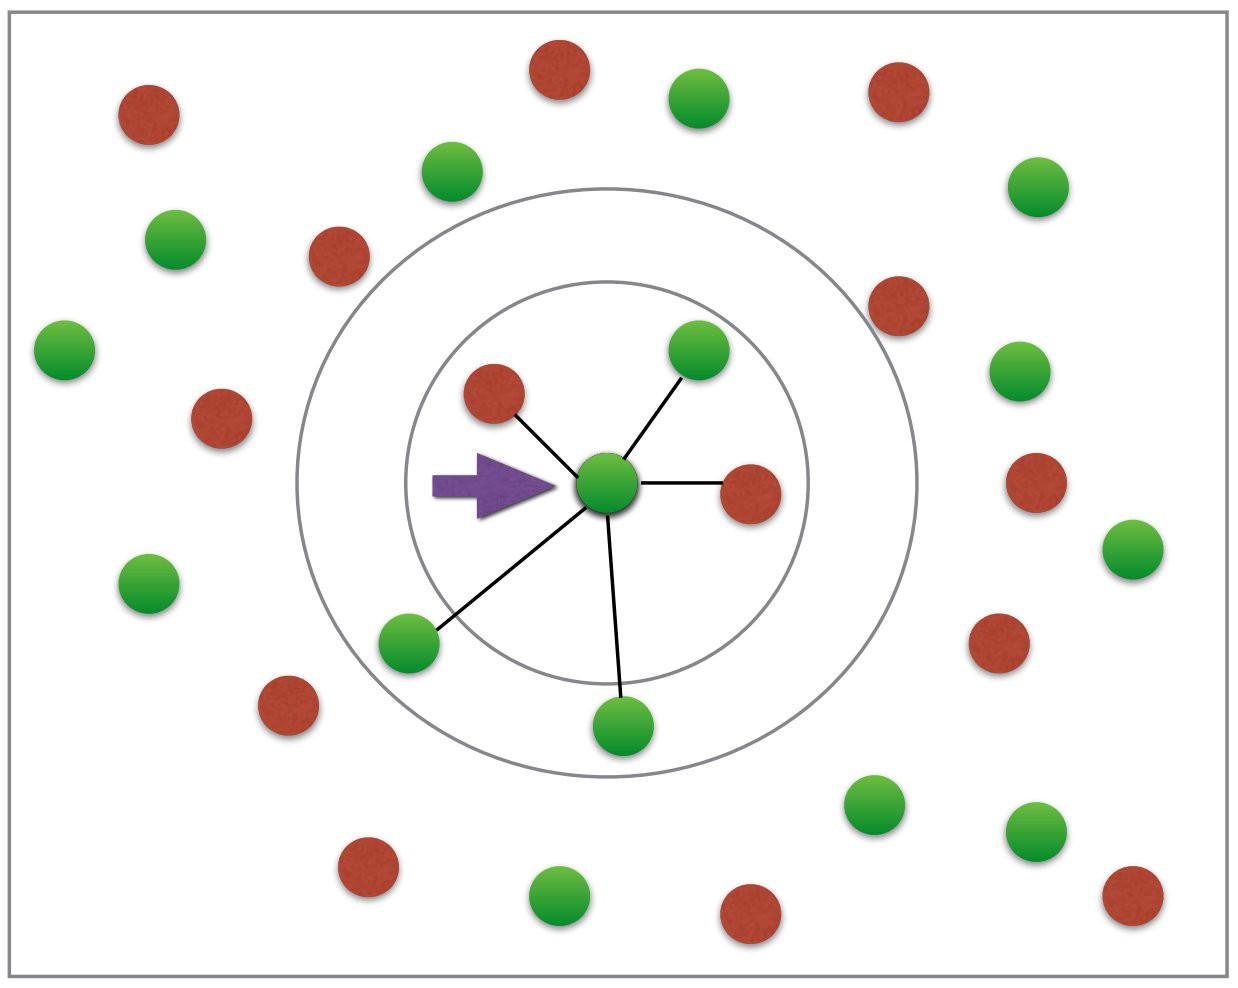

## imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
    
from functools import wraps

## Carregando Base de Dados

In [ ]:
!rm -r MLUD
!git clone https://github.com/Crissky/MLUD.git

Cloning into 'MLUD'...
remote: Enumerating objects: 250, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (234/234), done.
remote: Total 250 (delta 104), reused 60 (delta 6), pack-reused 0
Receiving objects: 100% (250/250), 1.66 MiB | 8.38 MiB/s, done.
Resolving deltas: 100% (104/104), done.


## Funções de Pré-Processamento

In [ ]:
def loadDataset(filename, delimiter=';'):
    baseDeDados = pd.read_csv(filename, delimiter=delimiter)
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values

    return X, y, baseDeDados

def fillMissingData(X, inicioColuna, fimColuna):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])

    return X

#só funciona se i = 0 ou i = ultima coluna
def computeCategorization(X):
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

    #one hot encoding
    D = pd.get_dummies(X[:,0]).values
    
    X = X[:,1:]
    for ii in range(0, D.shape[1]):
        X = np.insert(X, X.shape[1], D[:,ii], axis=1)
    X = X[:,:X.shape[1] - 1]

    return X

def splitTrainTestSets(X, y, testSize):
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)

    return XTrain, XTest, yTrain, yTest

def computeScaling(X):
    scale = StandardScaler()
    X = scale.fit_transform(X)

    return X, scale

In [ ]:
def printAccuracy(confunsionMatrix):
    accuracy = getAccuracy(confunsionMatrix)
    print('Confusion Matrix:\n', confunsionMatrix)
    print('Accuracy:', accuracy)

def getAccuracy(confunsionMatrix):
    accuracy = (confunsionMatrix[0][0] + confunsionMatrix[1][1])/ confunsionMatrix.sum()

    return (accuracy * 100)

## Regressão Logística

In [ ]:
def computeLogisticRegressionModel(XTrain, yTrain):
    classifier = LogisticRegression(solver='lbfgs')
    classifier.fit(XTrain, yTrain)
    
    return classifier

def predictModel(classifier, XTest):
    return classifier.predict(XTest)

def evaluateModel(yTest, yPred):
    confusionMatrix = confusion_matrix(yTest, yPred)

    return confusionMatrix

def computeLogisticRegressionExample(filename, delimiter=','):
    X, y, _ = loadDataset(filename, delimiter)
    X = fillMissingData(X, 2, 3)
    X = computeCategorization(X)
    X = computeCategorization(X)
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.15)
    XTrain, XTrainScale = computeScaling(XTrain) # No vídeo está recebendo a tupla em uma única variável. Fazendo com que no classifier.fit, da função computeLogisticRegressionModel, o XTrain tenha que se passado desta maneira XTrain[0]
    XTest, XTestScale = computeScaling(XTest)

    classifier = computeLogisticRegressionModel(XTrain, yTrain)

    yPred = predictModel(classifier, XTest)

    return evaluateModel(yTest, yPred)

## K-NN

In [ ]:
def computeKNNModel(XTrain, yTrain):
    classifier = KNeighborsClassifier(n_neighbors=5, p=1)
    classifier.fit(XTrain, yTrain)
    
    return classifier

def computeKNNExample(filename, delimiter=','):
    X, y, csv = loadDataset(filename, delimiter)
    X = fillMissingData(X, 2, 3)
    X = computeCategorization(X)
    X = computeCategorization(X)
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.15)
    XTrain, XTrainScale = computeScaling(XTrain) # No vídeo está recebendo a tupla em uma única variável. Fazendo com que no classifier.fit, da função computeLogisticRegressionModel, o XTrain tenha que se passado desta maneira XTrain[0]
    XTest, XTestScale = computeScaling(XTest)

    classifier = computeLogisticRegressionModel(XTrain, yTrain)

    yPred = predictModel(classifier, XTest)

    return evaluateModel(yTest, yPred)

## Comparando Regressão Logística com KNN

Média da Regressão Logística: 79.99
Desvio Padrão da Regressão Logística: 3.14

Média do KNN: 80.15
Desvio Padrão do KNN: 2.81


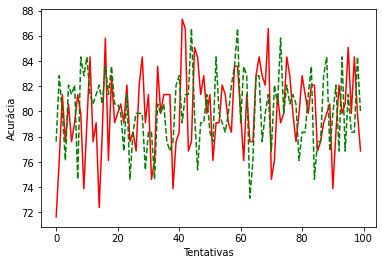

In [ ]:
rlArray = list()
for i in range(100):
    cmRL = computeLogisticRegressionExample('MLUD/Aula13/titanic.csv')
    rlArray.append(getAccuracy(cmRL))
print('Média da Regressão Logística: %.2f' % np.mean(rlArray))
print('Desvio Padrão da Regressão Logística: %.2f\n' % np.std(rlArray))

knnArray = list()
for i in range(100):
    cmKnn = computeKNNExample('MLUD/Aula13/titanic.csv')
    knnArray.append(getAccuracy(cmKnn))
print('Média do KNN: %.2f' % np.mean(knnArray))
print('Desvio Padrão do KNN: %.2f' % np.std(knnArray))

plt.plot(rlArray, 'r-', knnArray, 'g--')
plt.xlabel('Tentativas')
plt.ylabel('Acurácia')
plt.show()